In [1]:
import tweepy,json
from tweepy import *
 
import pandas as pd
import csv
import re 
import string
import preprocessor as p
 

consumer_key= "dKFZqHB8FyNi2ebbFjQGFPmkr"
consumer_secret= "wfj09vfMfAVFdYS6iy3rVYY546GUXn4KhLgE5EbCjGkfTzF7kC"
access_token= "3220731312-SlujZpUvkJ4Q0ltlVAD82WBPeTSQUOlJwPN5VR3"
access_token_secret= "YJKquEf4SwuZHyspdkie3Vt87H5VwkTK6uVmby5logt1A"
    
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [2]:
import tweepy
import datetime
import re
import tqdm 


number_of_tweets=5000
            
tweetList=[]
tweetList = tweepy.Cursor(api.search, q='#dhoni', trim_user=True, tweet_mode = 'extended',lang='en').items(number_of_tweets)

tweets_json = [tweet._json for tweet in tweetList]
df_fin = pd.DataFrame.from_records(tweets_json)


In [3]:
df_fin.to_csv('dhoni_5k.csv')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Apr 20 19:07:53 +0000 2021,1384584626597814277,1384584626597814277,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,615,0,False,False,False,en,NaN,NaN,NaN
1,Tue Apr 20 19:05:57 +0000 2021,1384584139131682818,1384584139131682818,RT @msdfansofficial: .@msdhoni: yaar ek player...,False,"[0, 140]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,226,0,False,False,NaN,en,NaN,NaN,NaN
2,Tue Apr 20 19:05:39 +0000 2021,1384584060689735684,1384584060689735684,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,615,0,False,False,False,en,NaN,NaN,NaN
3,Tue Apr 20 19:04:40 +0000 2021,1384583813402030082,1384583813402030082,RT @msdfansofficial: .@msdhoni: yaar ek player...,False,"[0, 140]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,226,0,False,False,NaN,en,NaN,NaN,NaN
4,Tue Apr 20 19:04:04 +0000 2021,1384583663787012098,1384583663787012098,RT @TrendsDhoni: On this day in 2006;\n\n@msdh...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,253,0,False,False,NaN,en,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Mon Apr 19 22:33:17 +0000 2021,1384273926654631940,1384273926654631940,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,False,616,0,False,False,False,en,NaN,NaN,NaN
4996,Mon Apr 19 22:30:59 +0000 2021,1384273349098893329,1384273349098893329,RT @SauravS_13: Well played guys 💛💛💛💛\nKasam s...,False,"[0, 144]","{'hashtags': [{'text': 'CSK', 'indices': [118,...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,58,0,False,False,NaN,en,NaN,NaN,NaN
4997,Mon Apr 19 22:30:56 +0000 2021,1384273334192414722,1384273334192414722,"RT @WMalkhat: @BatasariTweets ""I love my count...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,21,0,False,False,NaN,en,NaN,NaN,NaN
4998,Mon Apr 19 22:28:58 +0000 2021,1384272841856602114,1384272841856602114,RT @pragyanojha: And #MSD’s advice to #Jadeja ...,False,"[0, 134]","{'hashtags': [{'text': 'MSD', 'indices': [21, ...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,False,1976,0,False,False,NaN,en,NaN,NaN,NaN


In [9]:
df_fin.to_csv('dhoni_5k.csv')

In [21]:
new_df_forhashtag = df_fin[df_fin['retweeted_status'].isnull()]

In [22]:
new_df_forhashtag

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
12,12,Tue Apr 20 18:53:19 +0000 2021,1384580956808306690,1384580956808306690,Forever and ever\n@msdhoni \n@DHONIism \n@Chen...,False,"[0, 76]","{'hashtags': [{'text': 'Dhoni', 'indices': [51...","{'media': [{'id': 1384580953473912840, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,0,0,False,False,False,en,NaN,NaN,NaN
18,18,Tue Apr 20 18:48:37 +0000 2021,1384579775717511170,1384579775717511170,"Who will win ?\nmatch no 15, APRIL 21st 2021 #...",False,"[0, 165]","{'hashtags': [{'text': 'KKRvsCSK', 'indices': ...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,0,0,False,False,NaN,en,NaN,NaN,NaN
39,39,Tue Apr 20 18:25:01 +0000 2021,1384573836801155072,1384573836801155072,@msdfansofficial @msdhoni Yess the stumps mic....,False,"[26, 134]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,0,0,False,False,NaN,en,NaN,NaN,NaN
41,41,Tue Apr 20 18:23:06 +0000 2021,1384573355458658308,1384573355458658308,What will be your preference?\n\n@GooglePayInd...,False,"[0, 213]","{'hashtags': [{'text': 'PaytmCricketLeague', '...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,0,1,False,False,NaN,en,NaN,NaN,NaN
42,42,Tue Apr 20 18:22:39 +0000 2021,1384573242543788034,1384573242543788034,Die hard chennai super kings fan #Chennai #Yel...,False,"[0, 154]","{'hashtags': [{'text': 'Chennai', 'indices': [...","{'media': [{'id': 1384573240320819204, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,0,0,False,False,False,en,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,4949,Mon Apr 19 23:18:37 +0000 2021,1384285334163181570,1384285334163181570,@ChennaiIPL @SPFleming7 @msdhoni @CurranSM @im...,False,"[73, 352]","{'hashtags': [{'text': 'IPL2021', 'indices': [...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,2,3,False,False,NaN,en,NaN,NaN,NaN
4973,4973,Mon Apr 19 23:00:12 +0000 2021,1384280702657523714,1384280702657523714,#CSK #Dhoni\nEveryone : Dhoni is loosing the g...,False,"[0, 110]","{'hashtags': [{'text': 'CSK', 'indices': [0, 4...","{'media': [{'id': 1384280692146655236, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,0,3,False,False,False,en,NaN,NaN,NaN
4983,4983,Mon Apr 19 22:43:36 +0000 2021,1384276524396732419,1384276524396732419,"These lines..\n\n"" I can't guarantee performan...",False,"[0, 264]","{'hashtags': [{'text': 'Dhoni', 'indices': [24...","{'media': [{'id': 1384276516624756741, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,1,4,False,False,False,en,NaN,NaN,NaN
4990,4990,Mon Apr 19 22:39:05 +0000 2021,1384275386419224577,1384275386419224577,How Moocharoo Bot performed in this Bearish Ma...,False,"[0, 278]","{'hashtags': [{'text': 'aazifahzan', 'indices'...","{'media': [{'id': 1384233711806291969, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,0,1,False,False,False,en,NaN,NaN,NaN


In [40]:
from collections import Counter

hashtag_list = [] 
for ind in new_df_forhashtag.index:
    a=new_df_forhashtag['full_text'][ind]
    a=a.replace("\n"," ").replace("\\n"," ")
    a = a.translate(dict.fromkeys(map(ord, "!\"$%&'()*.?+-,/:;<=>@[\]^_`{|}~")))
    a=a.lower()
    if(a!=''):
        for word in a.split():
            if word[0] == '#': 
                hashtag_list.append(word[1:])

counts = (Counter(hashtag_list).most_common(11))

In [39]:
print(counts)

[('dhoni', 417), ('csk', 181), ('ipl2021', 127), ('whistlepodu', 83), ('msdhoni', 79), ('cskvrr', 71), ('cricket', 70), ('ipl', 63), ('cskvsrr', 58), ('kohli', 48), ('iplt20', 42)]


In [26]:
from pandas import DataFrame

df3b = DataFrame (counts,columns=['Hashtag','Count'])
df3b.reset_index()
df3b.index+=1
print(df3b)

        Hashtag  Count
1         dhoni    417
2           csk    181
3       ipl2021    127
4   whistlepodu     83
5       msdhoni     79
6        cskvrr     71
7       cricket     70
8           ipl     63
9       cskvsrr     58
10        kohli     48
11       iplt20     42


In [32]:
for index, row in (df3b.iterrows()):
    tweetList=[]
    a="#"+row["Hashtag"]
    filename=a
    tweetList=tweepy.Cursor(api.search, q=a, trim_user=True, tweet_mode = 'extended',lang='en').items(2000)
    tweets_json = [tweet._json for tweet in tweetList]
    df_fin = pd.DataFrame.from_records(tweets_json)
    df_fin.to_csv(filename)
    print(a)

#dhoni
#csk
#ipl2021
#whistlepodu
#msdhoni
#cskvrr
#cricket
#ipl
#cskvsrr
#kohli
#iplt20


In [27]:
import pandas as pd

df1 = pd.read_csv('#csk')
df2 = pd.read_csv('#ipl2021')
df3 = pd.read_csv('#whistlepodu')
df4 = pd.read_csv('#msdhoni')
df5 = pd.read_csv('#cskvrr')
df6 = pd.read_csv('#cricket')
df7 = pd.read_csv('#ipl')
df8 = pd.read_csv('#cskvsrr')
df9 = pd.read_csv('#kohli')
df10 = pd.read_csv('#iplt20')
df_fin=pd.read_csv('dhoni_5k.csv')

In [3]:
final_dataframeList = []
final_dataframeList.append(df_fin)
final_dataframeList.append(df1)
final_dataframeList.append(df2)
final_dataframeList.append(df3)
final_dataframeList.append(df4)
final_dataframeList.append(df5)
final_dataframeList.append(df6)
final_dataframeList.append(df7)
final_dataframeList.append(df8)
final_dataframeList.append(df9)
final_dataframeList.append(df10)


In [4]:
finaldf=pd.concat(final_dataframeList)
finaldf

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,withheld_scope,withheld_in_countries
0,0,Tue Apr 20 19:07:53 +0000 2021,1384584626597814277,1384584626597814277,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,1,Tue Apr 20 19:05:57 +0000 2021,1384584139131682818,1384584139131682818,RT @msdfansofficial: .@msdhoni: yaar ek player...,False,"[0, 140]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,2,Tue Apr 20 19:05:39 +0000 2021,1384584060689735684,1384584060689735684,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,3,Tue Apr 20 19:04:40 +0000 2021,1384583813402030082,1384583813402030082,RT @msdfansofficial: .@msdhoni: yaar ek player...,False,"[0, 140]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
4,4,Tue Apr 20 19:04:04 +0000 2021,1384583663787012098,1384583663787012098,RT @TrendsDhoni: On this day in 2006;\n\n@msdh...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Tue Apr 13 18:23:09 +0000 2021,1382036650495135746,1382036650495135746,Mumbai Indians won by 10 runs\n\n#kolkataknigh...,False,"[0, 158]","{'hashtags': [{'text': 'kolkataknightriders', ...","{'media': [{'id': 1382036637312421888, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,2,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1996,1996,Tue Apr 13 18:22:57 +0000 2021,1382036599978950656,1382036599978950656,RT if you never lost hope that we'll comeback ...,False,"[0, 181]","{'hashtags': [{'text': 'MIvsKKR', 'indices': [...","{'media': [{'id': 1382036597021966338, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,4,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1997,1997,Tue Apr 13 18:16:37 +0000 2021,1382035007854710784,1382035007854710784,Well played mota bhai \n#MIvsKKR \n#MumbaiIndi...,False,"[0, 66]","{'hashtags': [{'text': 'MIvsKKR', 'indices': [...","{'media': [{'id': 1382035004365017091, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,2,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1998,1998,Tue Apr 13 18:13:41 +0000 2021,1382034271104208898,1382034271104208898,KKR FAN GIRL VS MI FAN GIRL\n...,False,"[0, 96]","{'hashtags': [{'text': 'IPL2021', 'indices': [...","{'media': [{'id': 1382034243652505600, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,1,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [29]:
pakka_finaldf=finaldf.drop_duplicates(subset=['id_str'])

In [33]:
pakka_finaldf.to_csv('finalsec2data.csv')
pakka_finaldf

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,withheld_scope,withheld_in_countries
0,0,Tue Apr 20 19:07:53 +0000 2021,1384584626597814277,1384584626597814277,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,1,Tue Apr 20 19:05:57 +0000 2021,1384584139131682818,1384584139131682818,RT @msdfansofficial: .@msdhoni: yaar ek player...,False,"[0, 140]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,2,Tue Apr 20 19:05:39 +0000 2021,1384584060689735684,1384584060689735684,RT @Amritansh777: #CSKvRR #Dhoni best thing on...,False,"[0, 107]","{'hashtags': [{'text': 'CSKvRR', 'indices': [1...","{'media': [{'id': 1384203678647656449, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,3,Tue Apr 20 19:04:40 +0000 2021,1384583813402030082,1384583813402030082,RT @msdfansofficial: .@msdhoni: yaar ek player...,False,"[0, 140]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
4,4,Tue Apr 20 19:04:04 +0000 2021,1384583663787012098,1384583663787012098,RT @TrendsDhoni: On this day in 2006;\n\n@msdh...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Tue Apr 13 18:23:09 +0000 2021,1382036650495135746,1382036650495135746,Mumbai Indians won by 10 runs\n\n#kolkataknigh...,False,"[0, 158]","{'hashtags': [{'text': 'kolkataknightriders', ...","{'media': [{'id': 1382036637312421888, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,2,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1996,1996,Tue Apr 13 18:22:57 +0000 2021,1382036599978950656,1382036599978950656,RT if you never lost hope that we'll comeback ...,False,"[0, 181]","{'hashtags': [{'text': 'MIvsKKR', 'indices': [...","{'media': [{'id': 1382036597021966338, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,4,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1997,1997,Tue Apr 13 18:16:37 +0000 2021,1382035007854710784,1382035007854710784,Well played mota bhai \n#MIvsKKR \n#MumbaiIndi...,False,"[0, 66]","{'hashtags': [{'text': 'MIvsKKR', 'indices': [...","{'media': [{'id': 1382035004365017091, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,2,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1998,1998,Tue Apr 13 18:13:41 +0000 2021,1382034271104208898,1382034271104208898,KKR FAN GIRL VS MI FAN GIRL\n...,False,"[0, 96]","{'hashtags': [{'text': 'IPL2021', 'indices': [...","{'media': [{'id': 1382034243652505600, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,1,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [136]:
from collections import Counter
import numpy as np 

hashtag_list = [] 
new_col=[]
#pakka_finaldf['HashtagList']=pd.Series()
for ind in pakka_finaldf.index:
    a=pakka_finaldf.iloc[ind]['full_text']
    a=a.replace("\n"," ").replace("\\n"," ")
    a=a.translate(dict.fromkeys(map(ord, "!\"$%&'()*.?+-,/:;<=>@[\]^_`{|}~")))
    a=a.lower()
    if(a!=''):
        tweet_set=set()
        for word in a.split():
            if word[0] == '#': 
                tweet_set.add(word[1:])
        hashtag_list+=list(tweet_set)
        new_col.append(list(tweet_set))

pakka_finaldf['HashtagList']=new_col       
counts_occur = (Counter(hashtag_list).most_common(10))
counts_occur

<ipython-input-136-a2015d583efc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakka_finaldf['HashtagList']=new_col


[('dhoni', 14904),
 ('csk', 7803),
 ('jadeja', 3565),
 ('ipl2021', 2649),
 ('cskvrr', 2211),
 ('msdhoni', 2138),
 ('vivoipl', 1917),
 ('rrvcsk', 1877),
 ('whistlep…', 1861),
 ('msd’s', 1808)]

In [112]:
new_col

[['cskvrr', 'jadeja', 'dhoni'],
 ['whistlep…', 'dhoni'],
 ['cskvrr', 'jadeja', 'dhoni'],
 ['whistlep…', 'dhoni'],
 [],
 [],
 ['cskvrr', 'dhoni', 'whistlepodu'],
 ['kohli', 'dhoni'],
 ['kohli', 'dhoni'],
 ['dhoni', 'msdhoni'],
 [],
 ['cskvrr', 'jadeja', 'dhoni'],
 ['mahi', 'thala', 'dhoni', 'msd'],
 ['rrvcsk', 'msd’s', 'vivoipl', 'jadeja', 'dhoni”', 'csk'],
 [],
 ['whistlep…', 'dhoni'],
 ['cskvrr', 'jadeja', 'dhoni'],
 ['cskvrr', 'jadeja', 'dhoni'],
 ['iplprediction',
  'kkrvscsk',
  'kkrhaitaiyaar',
  'iplwin',
  'vivoipl',
  'yellow',
  'dhoni',
  'ipl2021',
  'ipl',
  'csk'],
 ['dhoni', 'msdhoni'],
 ['dhoni', 'msdhoni'],
 [],
 ['csk', '…', 'dhoni'],
 ['cskvsrr',
  'msd',
  'dhoni',
  'ipl2021',
  'chennaisuperkings',
  'captioncool',
  'csk'],
 [],
 ['dhoni'],
 ['cskvrr', 'jadeja', 'dhoni'],
 ['csk', 'cricket', 'dhoni'],
 [],
 ['dhoni', 'msdhoni'],
 ['kohli', 'dhoni'],
 ['kohli', 'dhoni'],
 ['cskvsrr',
  'msd',
  'dhoni',
  'ipl2021',
  'chennaisuperkings',
  'captioncool',
  'csk'],

In [96]:
pakka_finaldf['HashtagList']

0                            [cskvrr, jadeja, dhoni]
1                                 [whistlep…, dhoni]
2                            [cskvrr, jadeja, dhoni]
3                                 [whistlep…, dhoni]
4                                                 []
                            ...                     
1995    [csk, fans, dhoniouricon, dhoni, thaladhoni]
1996     [moeenali, dhoni, jadeja, cskvsrr, ipl2021]
1997                                         [dhoni]
1998                                         [dhoni]
1999                       [csk, dhoni, whistlepodu]
Name: HashtagList, Length: 20428, dtype: object

In [163]:
print(counts_occur)

[('dhoni', 14904), ('csk', 7803), ('jadeja', 3565), ('ipl2021', 2649), ('cskvrr', 2211), ('msdhoni', 2138), ('vivoipl', 1917), ('rrvcsk', 1877), ('whistlep…', 1861), ('msd’s', 1808)]


      Hashtag  Count
1       dhoni  14904
2         csk   7803
3      jadeja   3565
4     ipl2021   2649
5      cskvrr   2211
6     msdhoni   2138
7     vivoipl   1917
8      rrvcsk   1877
9   whistlep…   1861
10      msd’s   1808


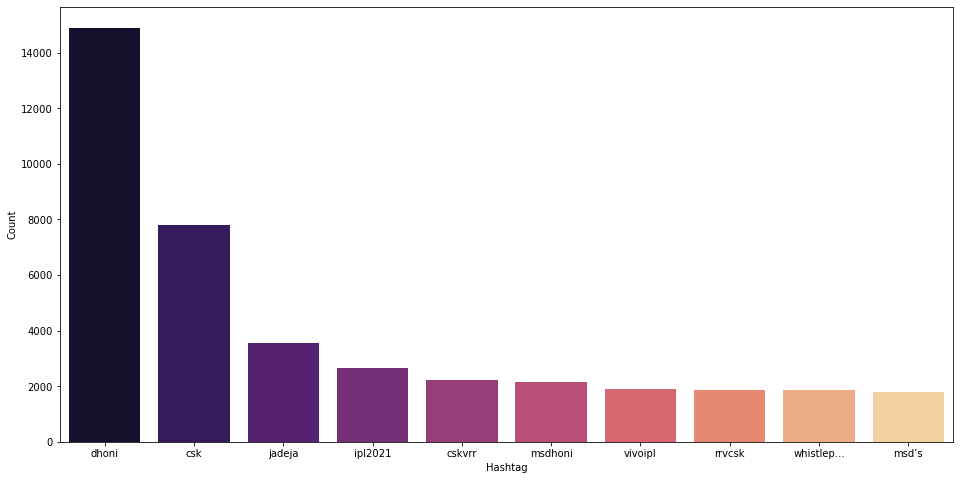

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

df3b_occur = DataFrame (counts_occur,columns=['Hashtag','Count'])
df3b_occur.reset_index()
df3b_occur.index+=1
print(df3b_occur)
plt.figure(figsize=(16,8))
prnt=sns.barplot(x="Hashtag", y="Count",data=df3b_occur,palette="magma",dodge=False)

In [139]:
new_pakkadf_wort = pakka_finaldf[pakka_finaldf['retweeted_status'].isnull()]
new_pakkadf_wort

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,...,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,withheld_scope,withheld_in_countries,HashtagList
12,12,Tue Apr 20 18:53:19 +0000 2021,1384580956808306690,1384580956808306690,Forever and ever\n@msdhoni \n@DHONIism \n@Chen...,False,"[0, 76]","{'hashtags': [{'text': 'Dhoni', 'indices': [51...","{'media': [{'id': 1384580953473912840, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,"[mahi, thala, dhoni, msd]"
18,18,Tue Apr 20 18:48:37 +0000 2021,1384579775717511170,1384579775717511170,"Who will win ?\nmatch no 15, APRIL 21st 2021 #...",False,"[0, 165]","{'hashtags': [{'text': 'KKRvsCSK', 'indices': ...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,"[iplprediction, kkrvscsk, kkrhaitaiyaar, iplwi..."
39,39,Tue Apr 20 18:25:01 +0000 2021,1384573836801155072,1384573836801155072,@msdfansofficial @msdhoni Yess the stumps mic....,False,"[26, 134]","{'hashtags': [{'text': 'Dhoni', 'indices': [12...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,[dhoni]
41,41,Tue Apr 20 18:23:06 +0000 2021,1384573355458658308,1384573355458658308,What will be your preference?\n\n@GooglePayInd...,False,"[0, 213]","{'hashtags': [{'text': 'PaytmCricketLeague', '...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,"[abd, cricket, maxwell, amazon, rcb, paytmcric..."
42,42,Tue Apr 20 18:22:39 +0000 2021,1384573242543788034,1384573242543788034,Die hard chennai super kings fan #Chennai #Yel...,False,"[0, 154]","{'hashtags': [{'text': 'Chennai', 'indices': [...","{'media': [{'id': 1384573240320819204, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,"[chennai, yellove, thala, sureshraina, dhoni, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,Tue Apr 13 18:23:10 +0000 2021,1382036655054356486,1382036655054356486,"#IPLT20 is completely fixed, they are just pla...",False,"[0, 102]","{'hashtags': [{'text': 'IPLT20', 'indices': [0...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,"[yellove, dhoni, bcci]"
1995,1995,Tue Apr 13 18:23:09 +0000 2021,1382036650495135746,1382036650495135746,Mumbai Indians won by 10 runs\n\n#kolkataknigh...,False,"[0, 158]","{'hashtags': [{'text': 'kolkataknightriders', ...","{'media': [{'id': 1382036637312421888, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,"[csk, fans, dhoniouricon, dhoni, thaladhoni]"
1996,1996,Tue Apr 13 18:22:57 +0000 2021,1382036599978950656,1382036599978950656,RT if you never lost hope that we'll comeback ...,False,"[0, 181]","{'hashtags': [{'text': 'MIvsKKR', 'indices': [...","{'media': [{'id': 1382036597021966338, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,"[moeenali, dhoni, jadeja, cskvsrr, ipl2021]"
1997,1997,Tue Apr 13 18:16:37 +0000 2021,1382035007854710784,1382035007854710784,Well played mota bhai \n#MIvsKKR \n#MumbaiIndi...,False,"[0, 66]","{'hashtags': [{'text': 'MIvsKKR', 'indices': [...","{'media': [{'id': 1382035004365017091, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,[dhoni]


In [178]:
hashtag_dict={}
for ind,row in new_pakkadf_wort.iterrows():
    templist=row['HashtagList']
    for h in templist:
        if h not in hashtag_dict.keys():
            hashtag_dict[h]=0
        hashtag_dict[h]+=row['favorite_count']

counts_like = (Counter(hashtag_dict).most_common(12))
counts_like = counts[:7]+counts[7:]
counts_like

[('dhoni', 41446),
 ('csk', 18407),
 ('ipl2021', 13598),
 ('msdhoni', 9182),
 ('whistlepodu', 6633),
 ('cskvrr', 5754),
 ('jadeja', 5719),
 ('kohli', 3171),
 ('cskvsrr', 2837),
 ('chennaisuperkings', 2549)]

              Hashtag  Count
1               dhoni  41446
2                 csk  18407
3             ipl2021  13598
4             msdhoni   9182
5         whistlepodu   6633
6              cskvrr   5754
7              jadeja   5719
8               kohli   3171
9             cskvsrr   2837
10  chennaisuperkings   2549


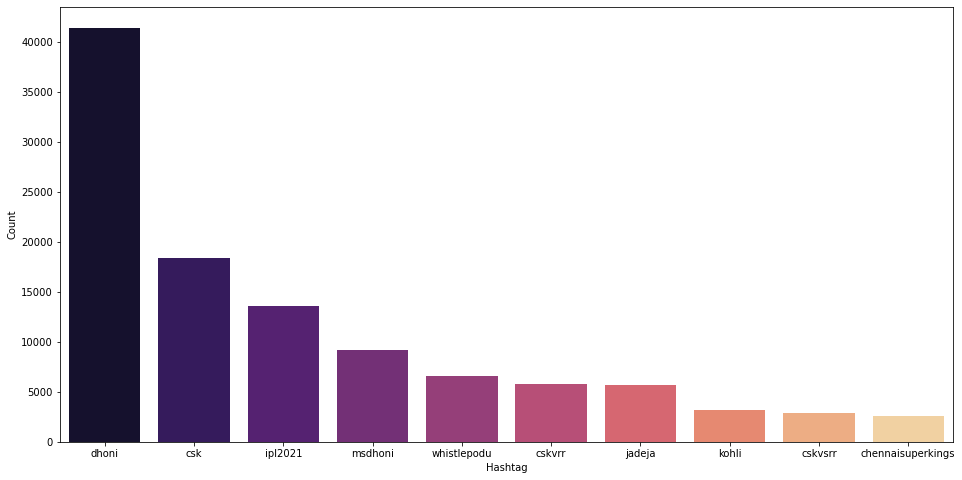

In [179]:
df3b_likes = DataFrame (counts_like,columns=['Hashtag','Count'])
df3b_likes.reset_index()
df3b_likes.index+=1
print(df3b_likes)
plt.figure(figsize=(16,8))
prnt=sns.barplot(x="Hashtag", y="Count",data=df3b_likes,palette="magma",dodge=False)

In [180]:
hashtag_dict={}
for ind,row in new_pakkadf_wort.iterrows():
    templist=row['HashtagList']
    for h in templist:
        if h not in hashtag_dict.keys():
            hashtag_dict[h]=0
        hashtag_dict[h]+=row['retweet_count']

counts_retweet = (Counter(hashtag_dict).most_common(11))
counts_retweet = counts_retweet[:8]+counts_retweet[9:]
counts_retweet

[('dhoni', 5286),
 ('csk', 2185),
 ('ipl2021', 1523),
 ('msdhoni', 1464),
 ('whistlepodu', 843),
 ('cskvrr', 544),
 ('whistlep…', 489),
 ('jadeja', 444),
 ('kohli', 370),
 ('cskvsrr', 354)]

        Hashtag  Count
1         dhoni   5286
2           csk   2185
3       ipl2021   1523
4       msdhoni   1464
5   whistlepodu    843
6        cskvrr    544
7     whistlep…    489
8        jadeja    444
9         kohli    370
10      cskvsrr    354


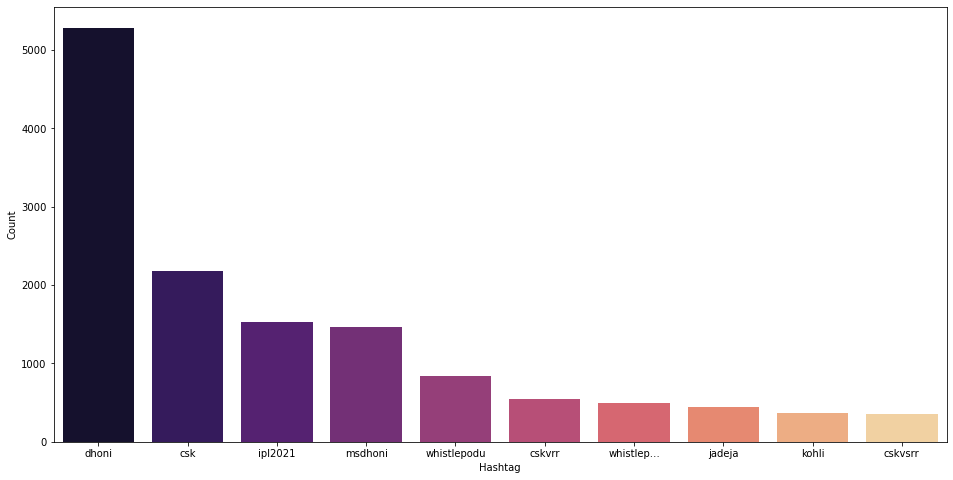

In [181]:
df3b_retweets = DataFrame (counts_retweet,columns=['Hashtag','Count'])
df3b_retweets.reset_index()
df3b_retweets.index+=1
print(df3b_retweets)
plt.figure(figsize=(16,8))
prnt=sns.barplot(x="Hashtag", y="Count",data=df3b_retweets,palette="magma",dodge=False)

In [215]:
def calc_ctm(pakka_finaldf,word):
    check=[]
    for ind, row in pakka_finaldf.iterrows():
        if word in row.HashtagList:
            check.append(True)
            continue
        check.append(False)

    pakka_finaldf_fin=pakka_finaldf[check]
    
    retweet_count = len(pakka_finaldf_fin[pakka_finaldf_fin['retweeted_status'].isnull()].index)
    origtweet_count = len(pakka_finaldf_fin[pakka_finaldf_fin['retweeted_status']==False].index)

    a = (100*retweet_count)/(retweet_count+origtweet_count)

    unique_usercount = pakka_finaldf_fin['id_str'].unique().size
    top_50 = pakka_finaldf_fin['id_str'].value_counts()
    traf_top_50 = top_50.nlargest(50).values.sum()

    b = (100*traf_top_50)/(retweet_count+origtweet_count)

    c = (retweet_count+origtweet_count)/unique_usercount

    coeff = a/10 + b + c
    
    return coeff



In [216]:
ctm_value=[]
for see in counts_occur:
    val=calc_ctm(pakka_finaldf,see[0])
    ctm_value.append(val)

ctm_table=pd.DataFrame({'Hashtag_Occurences':counts_occur, 'ctm':ctm_value})
ctm_table

,Hashtag_Occurences,ctm
0,"(dhoni, 14904)",11.778050
1,"(csk, 7803)",13.488348
2,"(jadeja, 3565)",18.407499
3,"(ipl2021, 2649)",18.235938
4,"(cskvrr, 2211)",22.179010
5,"(msdhoni, 2138)",20.233863
6,"(vivoipl, 1917)",26.823161
7,"(rrvcsk, 1877)",26.881705
8,"(whistlep…, 1861)",22.902069
9,"(msd’s, 1808)",28.075461


In [217]:
ctm_value=[]
for see in counts_like:
    val=calc_ctm(pakka_finaldf,see[0])
    ctm_value.append(val)

ctm_table=pd.DataFrame({'Hashtag_Likes':counts_like, 'ctm':ctm_value})
ctm_table

,Hashtag_Likes,ctm
0,"(dhoni, 41446)",11.778050
1,"(csk, 18407)",13.488348
2,"(ipl2021, 13598)",18.235938
3,"(msdhoni, 9182)",20.233863
4,"(whistlepodu, 6633)",25.015414
5,"(cskvrr, 5754)",22.179010
6,"(jadeja, 5719)",18.407499
7,"(kohli, 3171)",24.590442
8,"(cskvsrr, 2837)",23.360300
9,"(chennaisuperkings, 2549)",25.286553


In [218]:
ctm_value=[]
for see in counts_retweet:
    val=calc_ctm(pakka_finaldf,see[0])
    ctm_value.append(val)

ctm_table=pd.DataFrame({'Hashtag_Retweet':counts_retweet, 'ctm':ctm_value})
ctm_table

,Hashtag_Retweet,ctm
0,"(dhoni, 5286)",11.778050
1,"(csk, 2185)",13.488348
2,"(ipl2021, 1523)",18.235938
3,"(msdhoni, 1464)",20.233863
4,"(whistlepodu, 843)",25.015414
5,"(cskvrr, 544)",22.179010
6,"(whistlep…, 489)",22.902069
7,"(jadeja, 444)",18.407499
8,"(kohli, 370)",24.590442
9,"(cskvsrr, 354)",23.360300
